In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikithaprincy","key":"7e90162ab32db6e61baec9e3ffbd6676"}'}

In [3]:
!mkdir ~/.kaggle/

In [4]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

 98% 796M/812M [00:04<00:00, 302MB/s]
100% 812M/812M [00:04<00:00, 178MB/s]


In [6]:
!unzip -qq dogs-vs-cats.zip

In [7]:
!unzip -qq train.zip

#1. Consider The Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500.

Copying images to training,validation and test set.

In [15]:
import shutil
from pathlib import Path

original_dir = Path("train")
new_base_dir = Path("cats_vs_dogs_data_1")

# def rm_tree(pth: Path):
#     for child in pth.iterdir():
#         if child.is_file():
#             child.unlink()
#         else:
#             rm_tree(child)
#     pth.rmdir()

# rm_tree(new_base_dir)

def create_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir_path = new_base_dir / subset_name / category
        dir_path.mkdir(parents=True, exist_ok=True)  # Create directory if it doesn't exist
        fileNames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fileName in fileNames:
            shutil.copyfile(src=original_dir / fileName,
                            dst=dir_path / fileName)

create_subset("train", start_index=0, end_index=1000)
create_subset("validation", start_index=1000, end_index=1500)
create_subset("test", start_index=1500, end_index=2000)


Using convulational neural network.

In [16]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(180, 180, 3))
preprocessed_inputs = tf.keras.layers.Rescaling(1./255)(inputs)
conv_features = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(preprocessed_inputs)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.Flatten()(conv_features)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(conv_features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

Configures the model to use binary cross-entropy as the loss function, rmsprop as the optimizer, and accuracy as the evaluation metric

In [17]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

It can be observed that,model might overfit,thus,we use regularization technique in the stage of DATA PREPROCESSING.

creates three datasets: train_image_dataset, validation_image_dataset, and test_image_dataset

In [18]:

train_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


callback can be used to save the model's weights after every epoch or to stop training early if the model is not improving. Additionally, callbacks can be used to log metrics, visualize the model's performance, or schedule learning rate changes.

In [19]:

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="best_model_convnet_from_scratch_1000.keras",
        save_best_only=True,
        monitor="val_loss"),
      tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,  # Stop training if no improvement after 15 epochs
        restore_best_weights=True
    )
]

history = model.fit(
    train_image_dataset,
    epochs=30,
    validation_data=validation_image_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 5s 61ms/step - loss: 0.7148 - accuracy: 0.5045 - val_loss: 0.6923 - val_accuracy: 0.5600
Epoch 2/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6937 - accuracy: 0.5275 - val_loss: 0.6908 - val_accuracy: 0.5160
Epoch 3/30
63/63 [==============================] - 7s 110ms/step - loss: 0.6864 - accuracy: 0.5445 - val_loss: 0.6691 - val_accuracy: 0.5470
Epoch 4/30
63/63 [==============================] - 4s 58ms/step - loss: 0.6620 - accuracy: 0.6045 - val_loss: 1.1434 - val_accuracy: 0.5110
Epoch 5/30
63/63 [==============================] - 5s 74ms/step - loss: 0.6270 - accuracy: 0.6685 - val_loss: 0.6963 - val_accuracy: 0.5810
Epoch 6/30
63/63 [==============================] - 7s 108ms/step - loss: 0.5998 - accuracy: 0.6745 - val_loss: 0.7226 - val_accuracy: 0.6040
Epoch 7/30
63/63 [==============================] - 4s 57ms/step - loss: 0.5737 - accuracy: 0.7000 - val_loss: 0.6036 - val_accuracy: 0.6800
Epoch 8/30


load the saved model and evaluate its performance on the test dataset:

In [22]:

test_model = tf.keras.models.load_model("best_model_convnet_from_scratch_1000.keras")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 28ms/step - loss: 0.6160 - accuracy: 0.7260
Test accuracy: 0.726


Accuracy=98.6%
Validation Accuracy=74.7%
Test Accuracy=72.6%

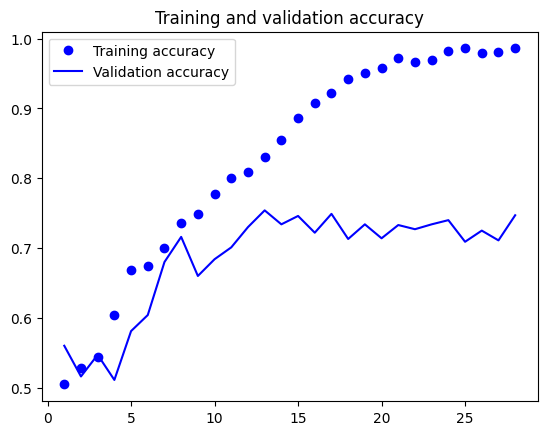

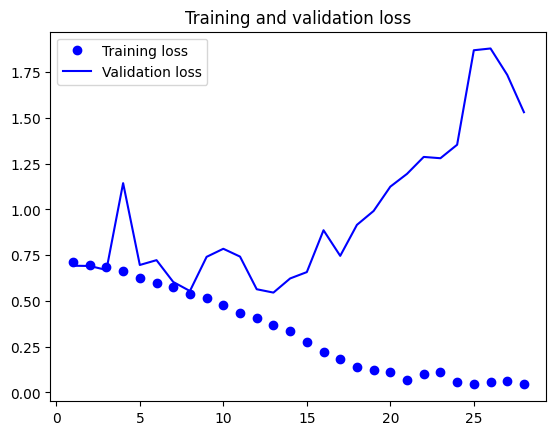

In [25]:

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#Data Augmentation

Data augmentation is a technique that generates new and modified versions of the original data to increase the size of a training set. This helps reduce overfitting and improve the model's generalization ability.

In [23]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2)
])

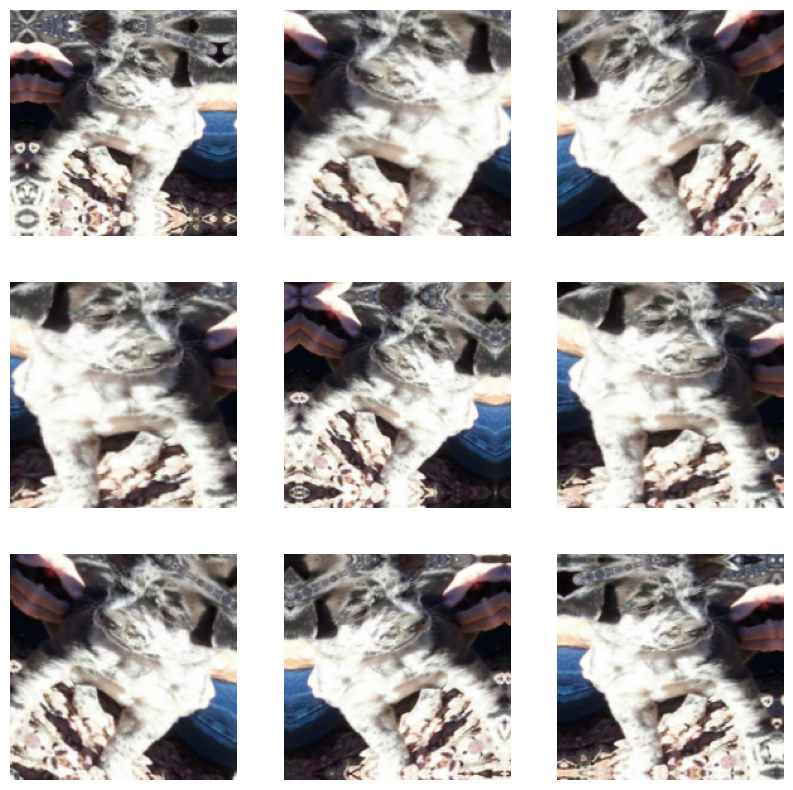

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_image_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [28]:
inputs = tf.keras.Input(shape=(180, 180, 3))
input = data_augmentation(inputs)
preprocessed_inputs = tf.keras.layers.Rescaling(1./255)(input)
conv_features = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(preprocessed_inputs)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.Flatten()(conv_features)
conv_features = tf.keras.layers.Dropout(0.5)(conv_features)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(conv_features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)



In [29]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [30]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_1.keras",
        save_best_only=True,
        monitor="val_loss"),
          tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,  # Stop training if no improvement after 15 epochs
        restore_best_weights=True
    )
]
history = model.fit(
    train_image_dataset,
    epochs=30,
    validation_data=validation_image_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 6s 66ms/step - loss: 0.7032 - accuracy: 0.4995 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 6s 96ms/step - loss: 0.6913 - accuracy: 0.5255 - val_loss: 0.6861 - val_accuracy: 0.6040
Epoch 3/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6906 - accuracy: 0.5490 - val_loss: 0.6744 - val_accuracy: 0.6090
Epoch 4/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6792 - accuracy: 0.5940 - val_loss: 0.6493 - val_accuracy: 0.6390
Epoch 5/30
63/63 [==============================] - 6s 95ms/step - loss: 0.6729 - accuracy: 0.5835 - val_loss: 0.6518 - val_accuracy: 0.5770
Epoch 6/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6371 - accuracy: 0.6330 - val_loss: 0.6136 - val_accuracy: 0.6510
Epoch 7/30
63/63 [==============================] - 4s 60ms/step - loss: 0.6231 - accuracy: 0.6505 - val_loss: 0.8349 - val_accuracy: 0.5970
Epoch 8/30
63

In [31]:

test_model = tf.keras.models.load_model(
    "convnet_from_scratch_with_augmentation_1.keras")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 28ms/step - loss: 0.4886 - accuracy: 0.7710
Test accuracy: 0.771


Accuracy=82.9%
Validation Accuracy=80.3%
Test Accuracy=77.1%

after incorporating data augmentation techniques, the model's performance has improved significantly across all datasets. The gap between the training, validation, and test accuracies has also reduced, indicating better generalization ability.

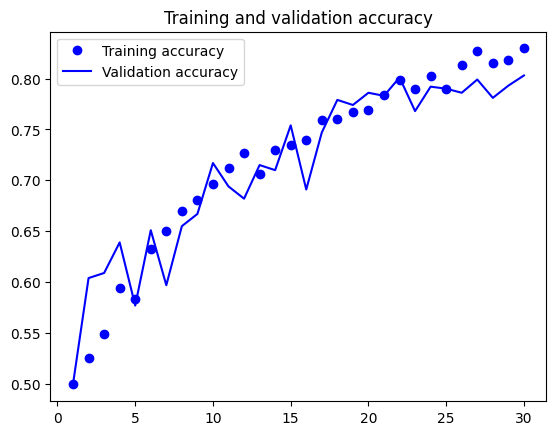

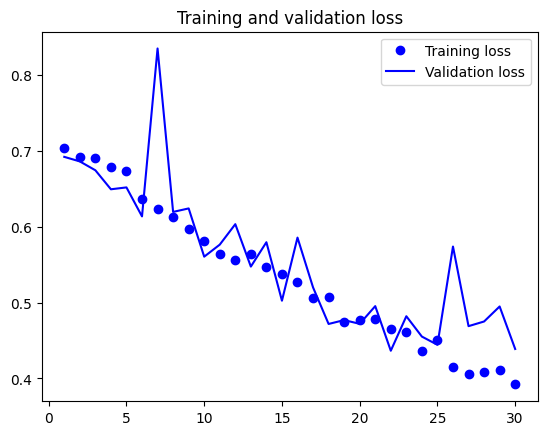

In [32]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#2) Increase your training sample size. Keeping the validation and test samples the same as above.

Attempted to increase training sample size from 1000 to 1500.

In [33]:

import shutil
from pathlib import Path

original_dir = Path("train")
new_base_dir = Path("cats_vs_dogs_data_2")

def create_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir_path = new_base_dir / subset_name / category
        dir_path.mkdir(parents=True, exist_ok=True)  # Create directory if it doesn't exist
        fileNames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fileName in fileNames:
            shutil.copyfile(src=original_dir / fileName,
                            dst=dir_path / fileName)

create_subset("train", start_index=0, end_index=1500)
create_subset("validation", start_index=1500, end_index=2000)
create_subset("test", start_index=2000, end_index=2500)

In [34]:

train_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [35]:
inputs = tf.keras.Input(shape=(180, 180, 3))
preprocessed_inputs = tf.keras.layers.Rescaling(1./255)(inputs)
conv_features = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(preprocessed_inputs)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.Flatten()(conv_features)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(conv_features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                     

In [36]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [37]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch2.keras",
        save_best_only=True,
        monitor="val_loss"),
     tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )
]
history = model.fit(
    train_image_dataset,
    epochs=30,
    validation_data=validation_image_dataset,
    callbacks=callbacks)

Epoch 1/30
94/94 [==============================] - 9s 80ms/step - loss: 0.7029 - accuracy: 0.5323 - val_loss: 0.6877 - val_accuracy: 0.5910
Epoch 2/30
94/94 [==============================] - 6s 54ms/step - loss: 0.6853 - accuracy: 0.5777 - val_loss: 0.7173 - val_accuracy: 0.5570
Epoch 3/30
94/94 [==============================] - 5s 54ms/step - loss: 0.6370 - accuracy: 0.6320 - val_loss: 0.6671 - val_accuracy: 0.6340
Epoch 4/30
94/94 [==============================] - 8s 88ms/step - loss: 0.6040 - accuracy: 0.6790 - val_loss: 0.6166 - val_accuracy: 0.6740
Epoch 5/30
94/94 [==============================] - 5s 52ms/step - loss: 0.5608 - accuracy: 0.7053 - val_loss: 0.5970 - val_accuracy: 0.6900
Epoch 6/30
94/94 [==============================] - 5s 56ms/step - loss: 0.5421 - accuracy: 0.7203 - val_loss: 0.5639 - val_accuracy: 0.6980
Epoch 7/30
94/94 [==============================] - 5s 51ms/step - loss: 0.4835 - accuracy: 0.7643 - val_loss: 0.5805 - val_accuracy: 0.7040
Epoch 8/30
94

In [38]:
test_model = tf.keras.models.load_model(
    "convnet_from_scratch2.keras")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 27ms/step - loss: 0.5411 - accuracy: 0.7430
Test accuracy: 0.743


Accuracy=98.4%
Validation Accuracy=75.3%
Test Accuracy=74.3%

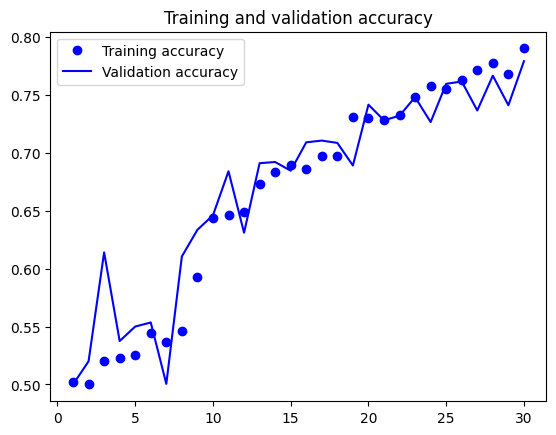

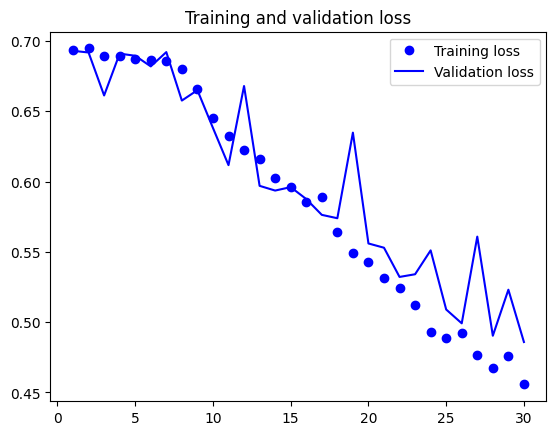

In [59]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

##using data augmentation

In [39]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(180, 180, 3))
input = data_augmentation(inputs)
preprocessed_inputs = tf.keras.layers.Rescaling(1./255)(input)
conv_features = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(preprocessed_inputs)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.Flatten()(conv_features)
conv_features = tf.keras.layers.Dropout(0.5)(conv_features)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(conv_features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])



In [40]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_2.keras",
        save_best_only=True,
        monitor="val_loss"),
         tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )
]
history = model.fit(
    train_image_dataset,
    epochs=30,
    validation_data=validation_image_dataset,
    callbacks=callbacks)

Epoch 1/30
94/94 [==============================] - 9s 56ms/step - loss: 0.7032 - accuracy: 0.5257 - val_loss: 0.6840 - val_accuracy: 0.5460
Epoch 2/30
94/94 [==============================] - 7s 72ms/step - loss: 0.6776 - accuracy: 0.5733 - val_loss: 0.6667 - val_accuracy: 0.5940
Epoch 3/30
94/94 [==============================] - 6s 59ms/step - loss: 0.6498 - accuracy: 0.6420 - val_loss: 0.6387 - val_accuracy: 0.6240
Epoch 4/30
94/94 [==============================] - 8s 76ms/step - loss: 0.6456 - accuracy: 0.6347 - val_loss: 0.6529 - val_accuracy: 0.6190
Epoch 5/30
94/94 [==============================] - 10s 105ms/step - loss: 0.6278 - accuracy: 0.6547 - val_loss: 0.6182 - val_accuracy: 0.6580
Epoch 6/30
94/94 [==============================] - 7s 66ms/step - loss: 0.6008 - accuracy: 0.6860 - val_loss: 0.5899 - val_accuracy: 0.6960
Epoch 7/30
94/94 [==============================] - 5s 53ms/step - loss: 0.5903 - accuracy: 0.6893 - val_loss: 0.5954 - val_accuracy: 0.6980
Epoch 8/30


In [41]:

test_model = tf.keras.models.load_model(
    "convnet_from_scratch_with_augmentation_2.keras")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 35ms/step - loss: 0.3749 - accuracy: 0.8470
Test accuracy: 0.847


Accuracy=86.3%
Validation Accuracy=83.4%
Test Accuracy=84.7%

 increasing the training sample size and applying data augmentation have significantly improved the model's performance, reducing the gap between the training, validation, and test accuracies

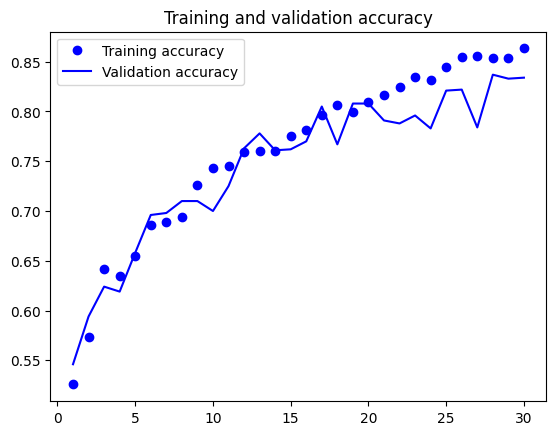

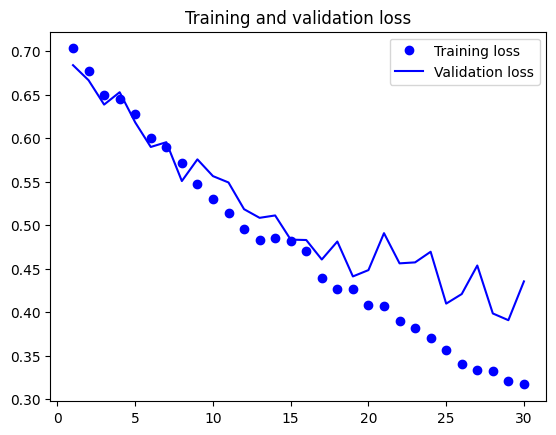

In [42]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#3. Finding the ideal training sample size

We set the training, validation, and test set sizes, respectively, to 1500, 1000, and 500.

In [43]:

import shutil
from pathlib import Path

original_dir = Path("train")
new_base_dir = Path("cats_vs_dogs_data_3")

def create_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir_path = new_base_dir / subset_name / category
        dir_path.mkdir(parents=True, exist_ok=True)  # Create directory if it doesn't exist
        fileNames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fileName in fileNames:
            shutil.copyfile(src=original_dir / fileName,
                            dst=dir_path / fileName)

create_subset("train", start_index=0, end_index=1500)
create_subset("validation", start_index=1500, end_index=2500)
create_subset("test", start_index=2500, end_index=3000)

In [44]:
train_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [45]:
inputs = tf.keras.Input(shape=(180, 180, 3))
inputs = tf.keras.Input(shape=(180, 180, 3))
preprocessed_inputs = tf.keras.layers.Rescaling(1./255)(inputs)
conv_features = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(preprocessed_inputs)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.Flatten()(conv_features)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(conv_features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [47]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch3.keras",
        save_best_only=True,
        monitor="val_loss"),
        tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )
]
history = model.fit(
    train_image_dataset,
    epochs=30,
    validation_data=validation_image_dataset,
    callbacks=callbacks)

Epoch 1/30
94/94 [==============================] - 9s 83ms/step - loss: 0.6986 - accuracy: 0.5287 - val_loss: 0.6920 - val_accuracy: 0.5325
Epoch 2/30
94/94 [==============================] - 8s 75ms/step - loss: 0.6880 - accuracy: 0.5697 - val_loss: 0.6584 - val_accuracy: 0.6150
Epoch 3/30
94/94 [==============================] - 7s 69ms/step - loss: 0.6544 - accuracy: 0.6273 - val_loss: 0.6372 - val_accuracy: 0.6335
Epoch 4/30
94/94 [==============================] - 10s 105ms/step - loss: 0.6177 - accuracy: 0.6587 - val_loss: 0.5729 - val_accuracy: 0.7100
Epoch 5/30
94/94 [==============================] - 9s 97ms/step - loss: 0.5646 - accuracy: 0.7117 - val_loss: 0.5681 - val_accuracy: 0.7015
Epoch 6/30
94/94 [==============================] - 7s 70ms/step - loss: 0.5351 - accuracy: 0.7223 - val_loss: 0.5799 - val_accuracy: 0.7025
Epoch 7/30
94/94 [==============================] - 7s 70ms/step - loss: 0.4842 - accuracy: 0.7620 - val_loss: 0.5460 - val_accuracy: 0.7255
Epoch 8/30


In [48]:

test_model = tf.keras.models.load_model(
    "convnet_from_scratch3.keras")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 28ms/step - loss: 0.5804 - accuracy: 0.7360
Test accuracy: 0.736


Accuracy=98.8%
Validation Accuracy=75.7%
Test Accuracy=73.6%

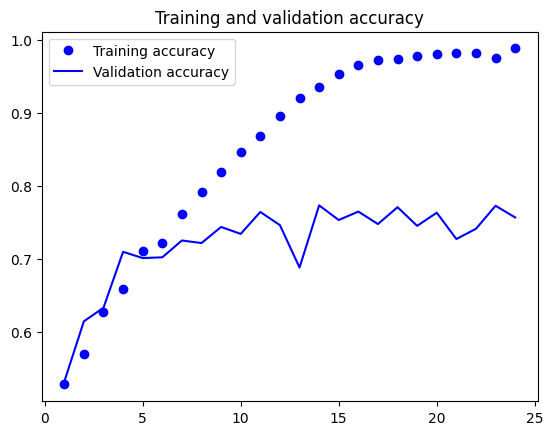

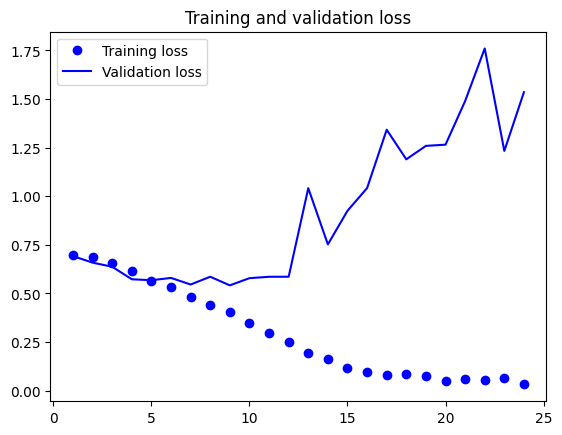

In [51]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

##Using Data augmentation

In [49]:

data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

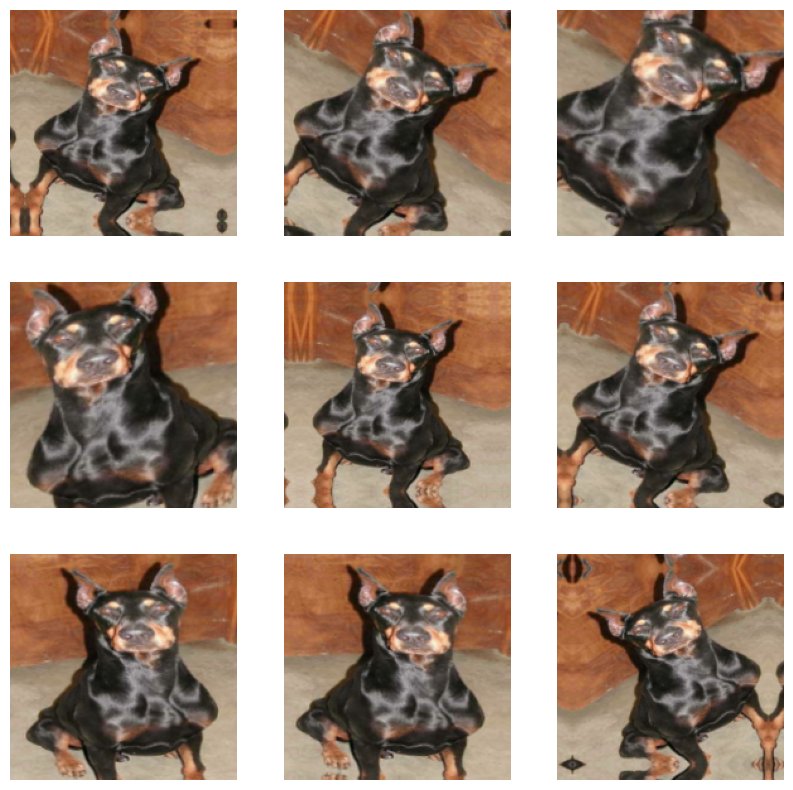

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_image_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [52]:

inputs = tf.keras.Input(shape=(180, 180, 3))
input = data_augmentation(inputs)
preprocessed_inputs = tf.keras.layers.Rescaling(1./255)(input)
conv_features = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(preprocessed_inputs)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.Flatten()(conv_features)
conv_features = tf.keras.layers.Dropout(0.5)(conv_features)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(conv_features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])




In [53]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_3.keras",
        save_best_only=True,
        monitor="val_loss"),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True)
]
history = model.fit(
    train_image_dataset,
    epochs=30,
    validation_data=validation_image_dataset,
    callbacks=callbacks)

Epoch 1/30
94/94 [==============================] - 9s 66ms/step - loss: 0.6937 - accuracy: 0.5023 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/30
94/94 [==============================] - 8s 84ms/step - loss: 0.6947 - accuracy: 0.5003 - val_loss: 0.6918 - val_accuracy: 0.5200
Epoch 3/30
94/94 [==============================] - 11s 116ms/step - loss: 0.6891 - accuracy: 0.5203 - val_loss: 0.6613 - val_accuracy: 0.6140
Epoch 4/30
94/94 [==============================] - 8s 88ms/step - loss: 0.6892 - accuracy: 0.5227 - val_loss: 0.6910 - val_accuracy: 0.5375
Epoch 5/30
94/94 [==============================] - 8s 80ms/step - loss: 0.6873 - accuracy: 0.5257 - val_loss: 0.6895 - val_accuracy: 0.5500
Epoch 6/30
94/94 [==============================] - 10s 99ms/step - loss: 0.6864 - accuracy: 0.5447 - val_loss: 0.6819 - val_accuracy: 0.5535
Epoch 7/30
94/94 [==============================] - 7s 70ms/step - loss: 0.6858 - accuracy: 0.5367 - val_loss: 0.6921 - val_accuracy: 0.5005
Epoch 8/30

In [55]:
test_model = tf.keras.models.load_model(
    "convnet_from_scratch_with_augmentation_3.keras")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")



32/32 [==============================] - 1s 29ms/step - loss: 0.5053 - accuracy: 0.7500
Test accuracy: 0.750


Accuracy=79.0%
Validation Accuracy=77.9%
Test Accuracy=75.0%

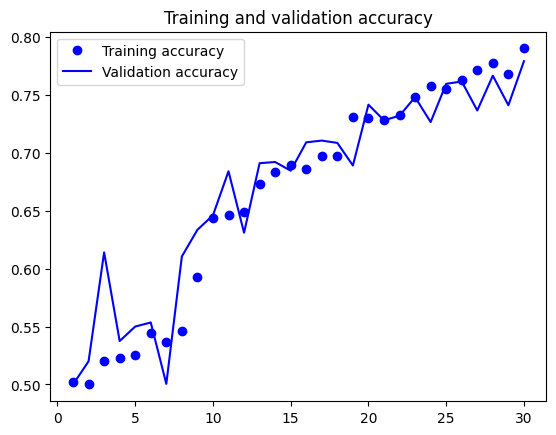

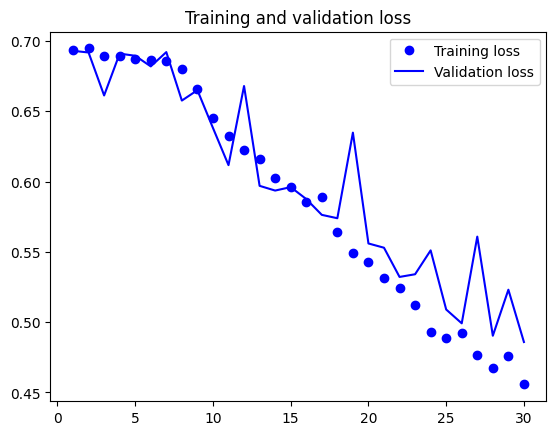

In [56]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#4.Using a pre-trained network

Feature extraction - Instantiating the VGG19 convolutional base

In [57]:
conv_base = tf.keras.applications.vgg19.VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

Feature extraction - Extracting features and corresponding labels

In [58]:

import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = tf.keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_image_dataset)
val_features, val_labels =  get_features_and_labels(validation_image_dataset)
test_features, test_labels =  get_features_and_labels(test_image_dataset)

train_features.shape

1/1 [==============================] - 2s 2s/step


(3000, 5, 5, 512)

Feature extraction - Defining and training the densely connected classifier

In [60]:
inputs = tf.keras.Input(shape=(5, 5, 512))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
      filepath="feature_extractionPT1.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=15,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/15
94/94 [==============================] - 2s 11ms/step - loss: 13.4048 - accuracy: 0.9390 - val_loss: 5.9491 - val_accuracy: 0.9710
Epoch 2/15
94/94 [==============================] - 1s 7ms/step - loss: 3.3759 - accuracy: 0.9817 - val_loss: 5.6678 - val_accuracy: 0.9705
Epoch 3/15
94/94 [==============================] - 1s 5ms/step - loss: 1.7593 - accuracy: 0.9847 - val_loss: 5.7360 - val_accuracy: 0.9760
Epoch 4/15
94/94 [==============================] - 1s 6ms/step - loss: 1.0719 - accuracy: 0.9920 - val_loss: 7.0957 - val_accuracy: 0.9730
Epoch 5/15
94/94 [==============================] - 1s 6ms/step - loss: 0.7829 - accuracy: 0.9930 - val_loss: 5.4689 - val_accuracy: 0.9745
Epoch 6/15
94/94 [==============================] - 1s 6ms/step - loss: 0.5710 - accuracy: 0.9927 - val_loss: 7.4343 - val_accuracy: 0.9690
Epoch 7/15
94/94 [==============================] - 1s 5ms/step - loss: 0.3817 - accuracy: 0.9953 - val_loss: 6.6265 - val_accuracy: 0.9760
Epoch 8/15
94/94 [

Accuracy=100%
Validation Accuracy =97.7%

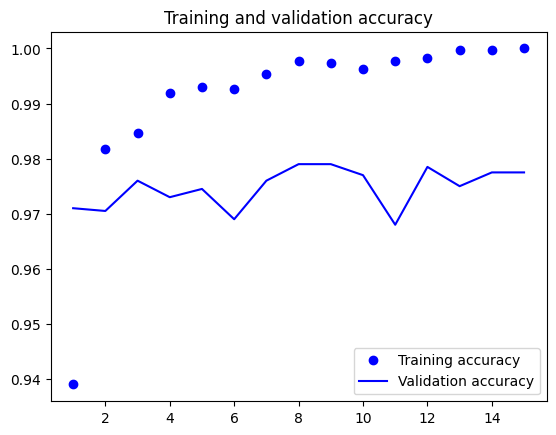

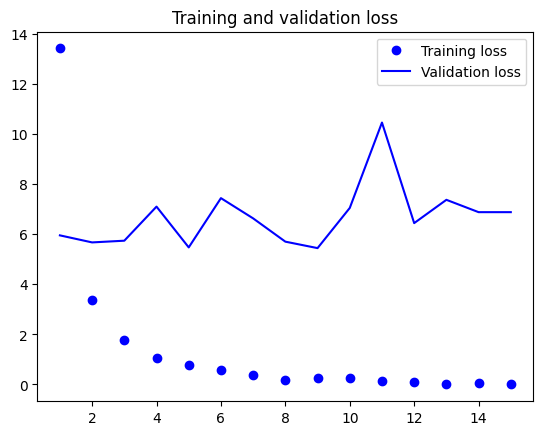

In [61]:

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [62]:
conv_base  = tf.keras.applications.vgg19.VGG19(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False


conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))


conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))


This is the number of trainable weights before freezing the conv base: 32
This is the number of trainable weights after freezing the conv base: 0


##Feature extraction with Data Augmentation

In [63]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.vgg19.preprocess_input(x)
x = conv_base(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [68]:

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentationPT2.h5",
        save_best_only=True,
        monitor="val_loss"),
      tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )
]
history = model.fit(
    train_image_dataset,
    epochs=30,
    validation_data=validation_image_dataset,
    callbacks=callbacks)

Epoch 1/30
94/94 [==============================] - ETA: 0s - loss: 7.0842 - accuracy: 0.9447

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94/94 [==============================] - 19s 199ms/step - loss: 7.0842 - accuracy: 0.9447 - val_loss: 4.8595 - val_accuracy: 0.9720
Epoch 2/30
94/94 [==============================] - 19s 199ms/step - loss: 5.9775 - accuracy: 0.9503 - val_loss: 5.1858 - val_accuracy: 0.9715
Epoch 3/30
94/94 [==============================] - 18s 194ms/step - loss: 5.5603 - accuracy: 0.9553 - val_loss: 4.4859 - val_accuracy: 0.9750
Epoch 4/30
94/94 [==============================] - 18s 193ms/step - loss: 3.8248 - accuracy: 0.9670 - val_loss: 4.2816 - val_accuracy: 0.9765
Epoch 5/30
94/94 [==============================] - 18s 194ms/step - loss: 3.5536 - accuracy: 0.9633 - val_loss: 3.7612 - val_accuracy: 0.9765
Epoch 6/30
94/94 [==============================] - 19s 197ms/step - loss: 2.7271 - accuracy: 0.9690 - val_loss: 3.8191 - val_accuracy: 0.9755
Epoch 7/30
94/94 [==============================] - 22s 229ms/step - loss: 2.8454 - accuracy: 0.9687 - val_loss: 2.9615 - val_accuracy: 0.9785
Epoch 8/30

In [69]:

test_model = tf.keras.models.load_model(
    "feature_extraction_with_data_augmentationPT2.h5")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 5s 109ms/step - loss: 0.9771 - accuracy: 0.9730
Test accuracy: 0.973


Accuracy=97.6%
Validation Accuracy=97.9%
Test Accuracy=97.3%

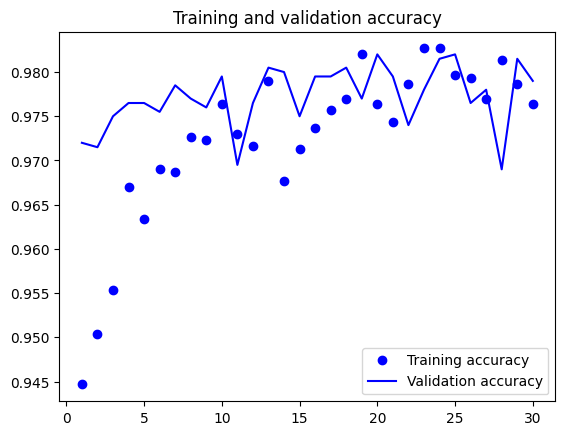

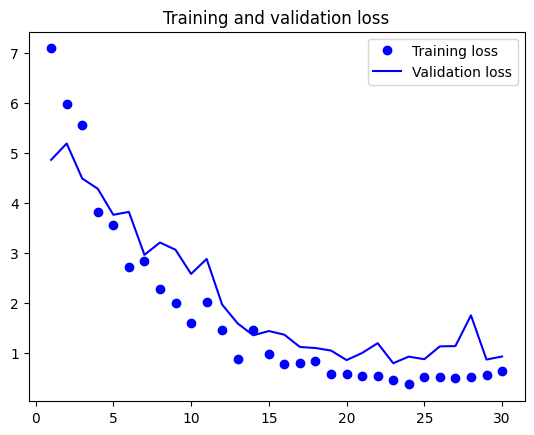

In [70]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()